In [11]:
import numpy as np
import pandas as pd
df= pd.read_excel('coffee_vs_temp.xlsx')

In [12]:
df.head()

,MAX_TEMP,N_COFFEE
0,27,167
1,17,80
2,21,98
3,30,167
4,28,124


In [13]:
df.loc[:,['MAX_TEMP']].head()

,MAX_TEMP
0,27
1,17
2,21
3,30
4,28


In [14]:
X  = np.array(df.loc[:,['MAX_TEMP']])
X[:5]

array([[27],
       [17],
       [21],
       [30],
       [28]])

In [15]:
y = np.array(df.loc[:, ['N_COFFEE']])
y[:7]

array([[167],
       [ 80],
       [ 98],
       [167],
       [124],
       [ 91],
       [110]])

In [16]:
import matplotlib.pyplot as plt 
% matplotlib inline

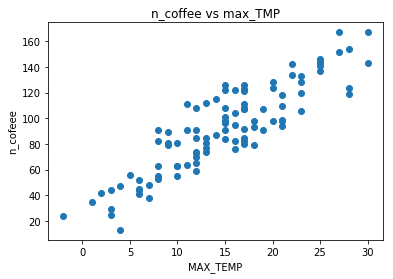

In [17]:
plt.scatter(X,y)
plt.title('n_coffee vs max_TMP')
plt.xlabel('MAX_TEMP')
plt.ylabel('n_cofeee')
plt.show()

In [18]:
df.corr()


,MAX_TEMP,N_COFFEE
MAX_TEMP,1.000000,0.889654
N_COFFEE,0.889654,1.000000


In [19]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

## 予測誤差
入力xに対する回帰式の予測式 f(xi)によって求められた結果との`差`のことを示す。
この予測誤差が小さければ小さいほど、学習の制度が高いと言える

## 最小２乗法
学習モデルの最適化手法のひとつ。
二乗誤差関数というものを誤差の基準とし、この式の値を最小にすることを目指す。

## 勾配降下法
 誤差を定義できたら、その誤差を元に、パラメータを調整していく。（勾配降下法）
 最急降下法、誤差関数の勾配を下ることで極小値をめざす
 
 
 

In [20]:
from sklearn.model_selection import learning_curve
lc = learning_curve(lr , X , y)

In [21]:
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
lr.intercept_
#定数項

array([ 28.69742186])

In [28]:
#係数の確認 : 説明変数の係数(coefficient)
lr.coef_

array([[ 4.26942921]])

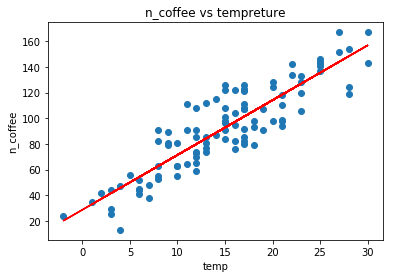

In [26]:
# グラフにしよう
plt.scatter(X,y)
plt.plot(X, lr.predict(X), color = 'red')
plt.title('n_coffee vs tempreture')
plt.xlabel('temp')
plt.ylabel('n_coffee')
plt.show()

In [30]:
#計測したいその日の気温
new_temp = 30
#予測
n_pred = lr.predict(new_temp)
print(n_pred)

[[ 156.78029823]]


## 因果関係
  一方の出来事が猛威ぽいの出来事を引き起こす、原因と結果の関係
  〇〇が変化すれば、必然的に××も変化するということ

## 凶変関係
二つの出来事がどちらともなく同時に起きる。
身長や体重の関係。。
因果関係だけでなく、凶変関係が成り立つときでも相関関係が成り立つことがある

→散布図や相関係数を見るだけじゃなく、出来事同士を本質的に捉えることが重要だったりする！